In [1]:
from helpers import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Run Helper

In [2]:
def run(X, y, X_test, y_test, test_split=0.3):
    kfold = model_selection.KFold(n_splits=5, random_state=7)
    for i, model in enumerate(models):
        cv_result = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

        model.fit(X, y)
        prediction_test = model.predict(X_test)

        acc_score_val = np.mean(cv_result)
        acc_score_test = accuracy_score(y_test, prediction_test)
        print ('-'*40)
        print ('val: {0}: {1}'.format(names[i], acc_score_val))
        print ('test: {0}: {1}'.format(names[i], acc_score_test))

# Models to Run

In [3]:
models = []
names = ['LR']

models.append((LogisticRegression(solver='lbfgs', max_iter=1000)))

# Adult Dataset

In [ ]:
df_adult, pct = load_adult('datasets/adult/adult.data')
X_adult = df_adult.iloc[:, :-1]
y_adult = df_adult.iloc[:, -1]
print('percentage of corrupt rows in training: {0:.1f}%'.format((1-pct)*100))

df_adult_test, pct = load_adult('datasets/adult/adult.test')
X_adult_test = df_adult_test.iloc[:, :-1]
y_adult_test = df_adult_test.iloc[:, -1]
print('percentage of corrupt rows in testing: {0:.1f}%'.format((1-pct)*100))

In [ ]:
cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax = ax.ravel()
for i, col in enumerate(cols):
    ax[i].hist(X_adult[col])
    median = X_adult[col].median()
    ax[i].set_title('{} Histogram, median = {}'.format(col, median), fontsize=12)
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frequency', fontsize=12)
# fig.savefig('2-quantiles-2.png')

# expanding (one-hot encoding)

In [ ]:
X_adult, X_adult_test = encode_adult(X_adult, X_adult_test)

X_adult_all = X_adult.append(X_adult_test)
X_adult_all_expand = pd.get_dummies(X_adult_all)

# X_expand, X_expand_test = encode_adult(X_expand, X_expand_test)
X_adult_expand = X_adult_all_expand[0:X_adult.shape[0]]
X_adult_expand_test = X_adult_all_expand[X_adult.shape[0]:]

In [ ]:
X_adult_expand.head()

In [ ]:
X_adult_expand_test.head()

In [ ]:
run(X_adult_expand, y_adult, X_adult_expand_test, y_adult_test)

# LabelEncoder

In [ ]:
# encoders = {"workclass": preprocessing.LabelEncoder(), 
#             "education": preprocessing.LabelEncoder(), 
#             "marital-status": preprocessing.LabelEncoder(), 
#             "occupation": preprocessing.LabelEncoder(), 
#             "relationship": preprocessing.LabelEncoder(), 
#             "race": preprocessing.LabelEncoder(), 
#             "native-country": preprocessing.LabelEncoder()}

# X_encoded = encode(X_adult, encoders)
# X_encoded_test = encode(X_adult_test, encoders)

In [ ]:
# run(X_encoded, y_adult, X_encoded_test, y_adult_test)

# German Dataset

In [4]:
# load german dataset
df_german = load_german('datasets/german/german.data')
X_german = df_german.iloc[:, :-1]
y_german = df_german.iloc[:, -1]

X_german, X_german_test, y_german, y_german_test = train_test_split(X_german, y_german, test_size=0.3, random_state=0)

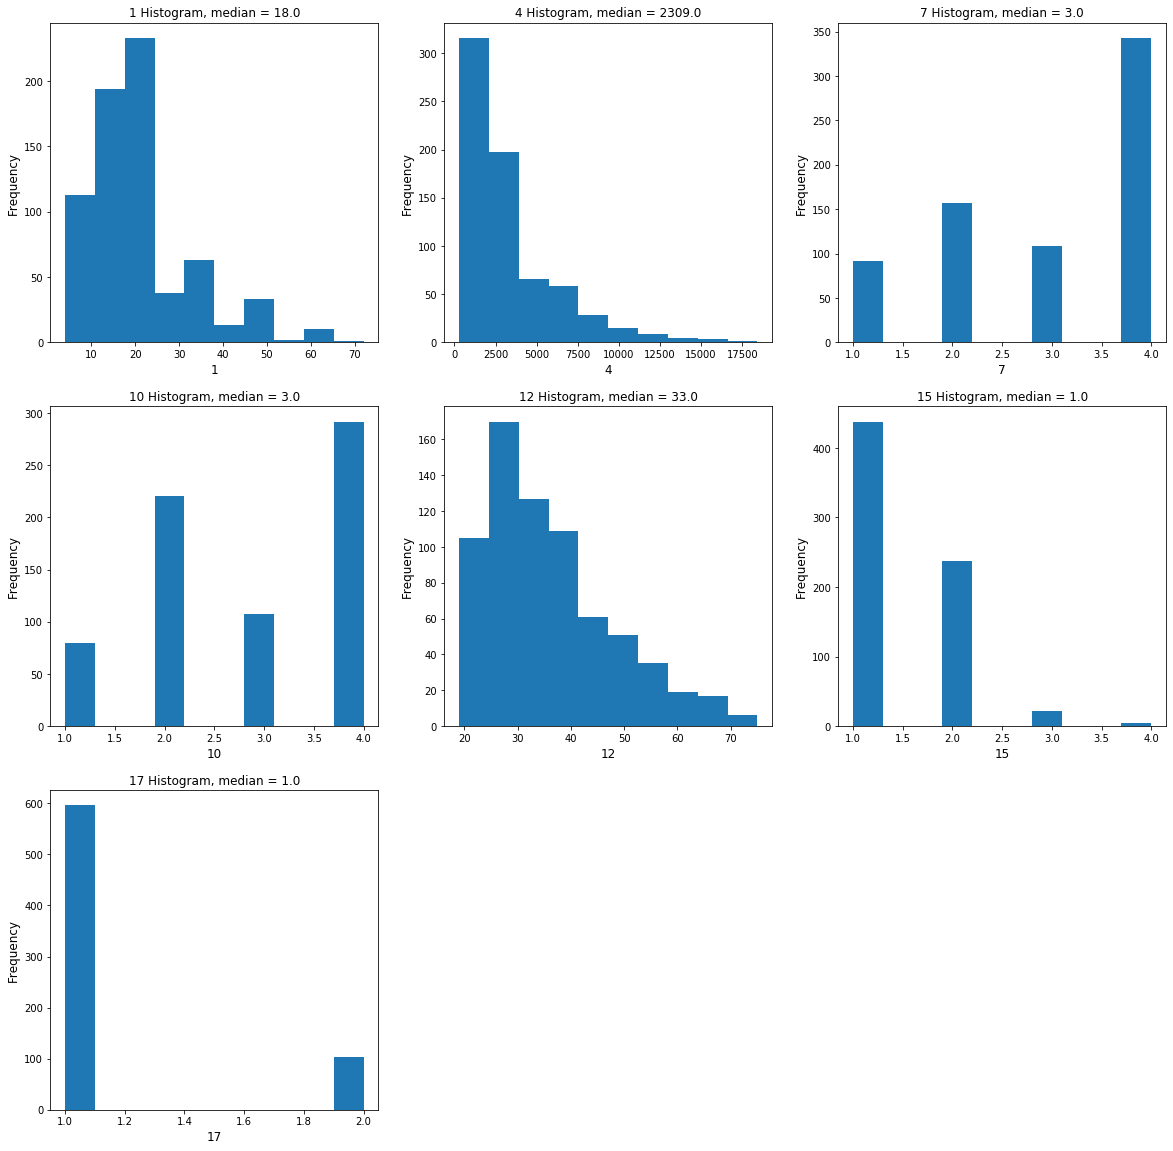

In [5]:
cols = [1, 4, 7, 10, 12, 15, 17]
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.ravel()
for i, col in enumerate(cols):
    ax[i].hist(X_german[col])
    median = X_german[col].median()
    ax[i].set_title('{} Histogram, median = {}'.format(col, median), fontsize=12)
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frequency', fontsize=12)
fig.delaxes(ax[7])
fig.delaxes(ax[8])
# fig.savefig('2-quantiles-2.png')

# expanding (one-hot encoding)

In [6]:
X_german, X_german_test = encode_german(X_german, X_german_test)

X_german_all = X_adult.append(X_german_test)
X_german_all_expand = pd.get_dummies(X_german_all)

# X_expand, X_expand_test = encode_adult(X_expand, X_expand_test)
X_german_expand = X_german_all_expand[0:X_german.shape[0]]
X_german_expand_test = X_german_all_expand[X_german.shape[0]:]

NameError: name 'X_adult' is not defined

In [ ]:
X_german_expand.head()

In [ ]:
X_german_expand_test.head()

In [ ]:
run(X_german_expand, y_german, X_german_expand_test, y_german_test)

# Discrimination

In [ ]:
# SA = 'Age'
# s = 'Young'
# positive = 0

# X_german_s = X_german.copy()
# X_german_s[X_german_s['Age'] <= 25] = 1 # protected
# X_german_s[X_german_s['Age'] > 25] = 0 # not protected

# conf_aged = 0
# conf_young = 0
# for index, p in enumerate(y_german):
#     if p == positive:
#         if X_german_s.loc[index, 'Age'] == 0:
#             conf_aged += 1
#         else: # X_german_s.loc[index, 'Age'] == 1 (i.e. protected)
#             conf_young += 1

# conf_aged /= len(X_german_s[X_german_s['Age'] == 0])
# conf_young /= len(X_german_s[X_german_s['Age'] == 1])
# print(conf_aged, conf_young)
# print('DISC = {0:.4f}'.format(conf_aged - conf_young))

In [ ]:
# SA = 'Age'
# s = 'Young'
# positive = 0

# X_german_s = X_german.copy()
# X_german_s[X_german_s['Age'] <= 25] = 1 # protected
# X_german_s[X_german_s['Age'] > 25] = 0 # not protected

# X_train, X_test, y_train, y_test = train_test_split(X_german_s, y_german, test_size=0.3, random_state=42)

# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# pred = lr.predict(X_test)

# conf_aged = 0
# conf_young = 0
# for index, p in enumerate(pred):
#     if p == positive:
#         if X_german_s.loc[index, 'Age'] == 0:
#             conf_aged += 1
#         else: # X_german_s.loc[index, 'Age'] == 1 (i.e. protected)
#             conf_young += 1

# conf_aged /= len(X_german_s[X_german_s['Age'] == 0])
# conf_young /= len(X_german_s[X_german_s['Age'] == 1])
# print(conf_aged, conf_young)
# print('DISC = {0:.4f}'.format(conf_aged - conf_young))